In [ ]:
import pickle

In [ ]:
ls

drive/  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
X_ai = pickle.load(open('X_ai.pkl','rb'))
y_ai = pickle.load(open('y_ai.pkl','rb'))

In [ ]:
X_dl = pickle.load(open('X_dl.pkl','rb'))
y_dl = pickle.load(open('y_dl.pkl','rb'))

In [ ]:
X_ai = X_ai/255


In [ ]:
X_dl = X_dl / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1,mode='min',verbose=1,restore_best_weights=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPool2D
import tensorflow as tf
import tensorflow

In [ ]:
model = tensorflow.keras.models.Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
 
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))
 
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))
 
model.add(Flatten())
 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(2,activation='softmax'))
 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_ai,y_ai,epochs=5,validation_data=(X_dl,y_dl),batch_size=64)


Epoch 1/5
360/360 [==============================] - 110s 209ms/step - loss: 0.6921 - accuracy: 0.6113 - val_loss: 0.5992 - val_accuracy: 0.6610
Epoch 2/5
360/360 [==============================] - 74s 205ms/step - loss: 0.5789 - accuracy: 0.6991 - val_loss: 0.5371 - val_accuracy: 0.7215
Epoch 3/5
360/360 [==============================] - 74s 205ms/step - loss: 0.5105 - accuracy: 0.7474 - val_loss: 0.4947 - val_accuracy: 0.7555
Epoch 4/5
360/360 [==============================] - 74s 205ms/step - loss: 0.4555 - accuracy: 0.7863 - val_loss: 0.4869 - val_accuracy: 0.7665
Epoch 5/5
360/360 [==============================] - 74s 204ms/step - loss: 0.3920 - accuracy: 0.8217 - val_loss: 0.4659 - val_accuracy: 0.7840


In [ ]:
import pandas as pd
df = pd.DataFrame(model.history.history)

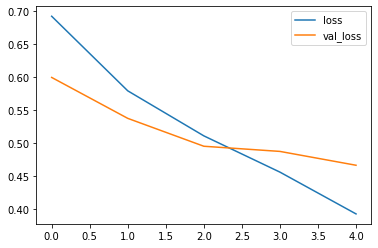

In [ ]:
df[['loss','val_loss']].plot()

In [ ]:
test_loss, accuracy = model.evaluate(X_dl,y_dl)

63/63 [==============================] - 3s 29ms/step - loss: 0.4659 - accuracy: 0.7840


In [ ]:
print(accuracy)

0.7839999794960022


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict_classes(X_dl)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_dl,predictions))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1000
           1       0.75      0.85      0.80      1000

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



In [ ]:
#accuracy with paddig='same' = 0.77

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

imgs = np.random.randint(25,100,10)
print(imgs)

for i in imgs:
  plt.subplot(5, 2, i+1)
  model.out = np.argmax(model.predict(X_dl[i].reshape(1,100,100,3)))
  if model.out == 0:
    str_label = "Cat"
  else:
    str_label = "Dog"

  #print(model.out)
  plt.tight_layout()
  plt.title(str_label)
  plt.show(plt.imshow(X_dl[i]))


[74 60 28 38 78 38 36 41 29 69]


ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
imgs = np.random.randint(25,100,10)
print(imgs)